# This script is for normal illumination

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sys, os, shutil
import random
import fnmatch

# Plan
Make 10 batches of cutouts. The interval between batches is 30320. In total it takes 10 interval with the same size up to 305698 (highest focus metric). Then take 100 cutouts randomly from each batch and put them in a new folder for further analysis. The nummber of cutouts inside each batch is as following:

- 1st batch (metric:2494-32814) contains 2185 cutouts.


- 2nd batch (metric:32814-63134) contains 227 cutouts.


- 3rd batch (metric:63134-93454) contains 167 cutouts.


- 4th batch (metric:93454-123774) contains 124 cutouts.


- 5th batch (metric:123774-154094) contains 137 cutouts.


- 6th batch (metric:154094-184414) contains 139 cutouts.


- 7th batch (metric:184414-214734) contains 55 cutouts.


- 8th batch (metric:214734-245054) contains 14 cutouts.


- 9th batch (metric:245054-275374) contains 0 cutouts.


- 10th batch (metric:275374-305698) contains 1 cutouts.


In [39]:
path = '/Volumes/harddrive/Lab_1stJune/Cutouts/normal_cutout'

dest = '/Volumes/harddrive/Lab_1stJune/random/random_normal/batch10'

files = os.listdir(path)

for file in files:
    if (275374 <= float(file.split('_')[1]) <= 305698):
        mainpath = os.path.join(path, file)
        shutil.copy(mainpath, dest)

In [40]:
b = []
for file in files:
    if (275374 <= float(file.split('_')[1]) <= 305698):
        #print(file)
        #print(file)
        b.append(file) 
        
np.array(b).shape

(1,)

In [46]:
#random.sample(focus_ax, 50)
source = '/Volumes/harddrive/Lab_1stJune/random/random_normal/batch6'
destination = '/Volumes/harddrive/Lab_1stJune/random/random_normal/random_100/b6'

filenames = random.sample(os.listdir(source), 100)

for fname in filenames:
    srcpath = os.path.join(source, fname)
    shutil.copy(srcpath, destination)

#np.array(b1).shape
#filenames

# Statistic: Useful cutouts

The number of useful cutouts inside each batch is as following:

- 1st batch: 0 (out of 100 random cutout)
- 2nd batch: 0 (out of 100 random cutout)
- 3rd batch: 0 (out of 100 random cutout)
- 4th batch: 53 (out of 100 random cutout)
- 5th batch: 89 (out of 100 random cutout)
- 6th batch: 96 (out of 100 random cutout)
- 7th batch: 43 (out of 55 random cutout)
- 8th batch: 6 (out of 14 random cutout)
- 9th batch: 0 (out of 0 random cutout)
- 10th batch: 0 (out of 1 random cutout)

In total, 287 cutouts are useful.

<IPython.core.display.Javascript object>


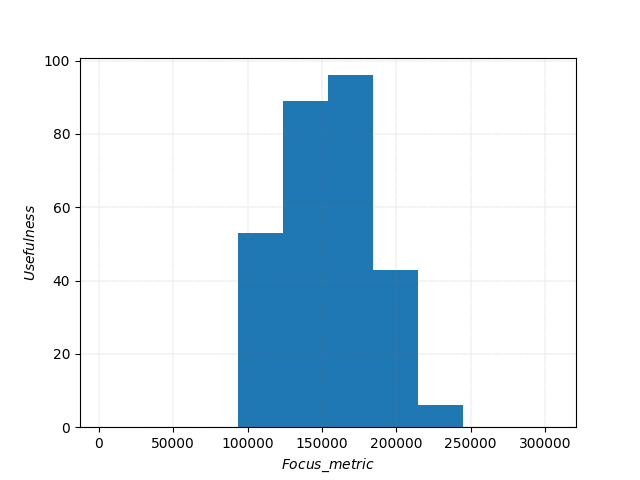

In [3]:
binwidth = 30320

focus = [2494,32814,63134,93454,123774,154094,184414,214734,245054,275374,305698]
Usefulness = [0,0,0,53,89,96,43,6,0,0] 
plt.figure()

bin_centers = np.array([(focus[i] + focus[i+1])/2 for i in range(len(Usefulness))])
plt.bar(bin_centers, Usefulness, width=binwidth)
#plt.plot(bin_centers, yhist/2, 'ko:')
plt.xlabel('$Focus$_$metric$')
plt.ylabel('$Usefulness$')
plt.grid(c = 'grey',linestyle=':', linewidth=0.3)
plt.show()

<IPython.core.display.Javascript object>


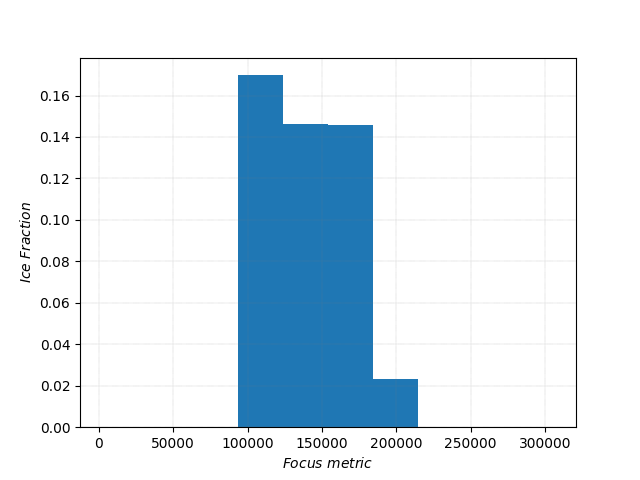

array([0.        , 0.        , 0.        , 0.16981132, 0.14606742,
       0.14583333, 0.02325581, 0.        , 0.        , 0.        ])

In [6]:
binwidth = 30320

batch_ice = [0,0,0,9,13,14,1,0,0,0]
Usefulness = [0,0,0,53,89,96,43,6,0,0] 

focus = [2494,32814,63134,93454,123774,154094,184414,214734,245054,275374,305698]

batch_fraction = np.array(batch_ice, dtype=np.float)
batch_fraction[np.where(np.array(Usefulness) > 0)] = np.array(batch_ice, dtype=np.float)[np.where(np.array(Usefulness) > 0)]/np.array(Usefulness)[np.where(np.array(Usefulness) > 0)]

plt.figure()

bin_centers = np.array([(focus[i] + focus[i+1])/2 for i in range(len(batch_fraction))])
plt.bar(bin_centers, batch_fraction, width=binwidth)
#plt.plot(bin_centers, yhist/2, 'ko:')
plt.xlabel('$Focus$ $metric$')
plt.ylabel('$Ice$ $Fraction$')
plt.grid(c = 'grey',linestyle=':', linewidth=0.3)
plt.show()
batch_fraction

From the plot above (Ice fraction vs Focus metric), we understand that we should mostly look at the focus region between roughly 100 k and 200 k to get a correct value for ice fraction because the ice fraction in those three batches are almost the same i.e., 0.17, 0.15 and 0.14.

# Ice statistic

Among the random chosen cutouts, from those that are useful (focused, complete cut), we estimate the ice fraction. From previous section, total useful droplets that were randomly chosen are 287. Therefore, the ice fraction are calculated out of 287 droplets.

- 1st batch: 0
- 2nd batch: 0
- 3rd batch: 0 
- 4th batch: 4 side-blob, 4 distorted, 1 fractured 
- 5th batch: 8 side-blob, 1 rippling, 4 distorted
- 6th batch: 4 rippling, 9 side-blob, 1 fractured
- 7th batch: 1 side-blob
- 8th batch: 0
- 9th batch: 0
- 10th batch: 0


In total, we have 5 rippling, 22 side-blob, 8 distorted and 2 fractured (37 frozen droplet). therefore ice fraction is 0.077.


<IPython.core.display.Javascript object>


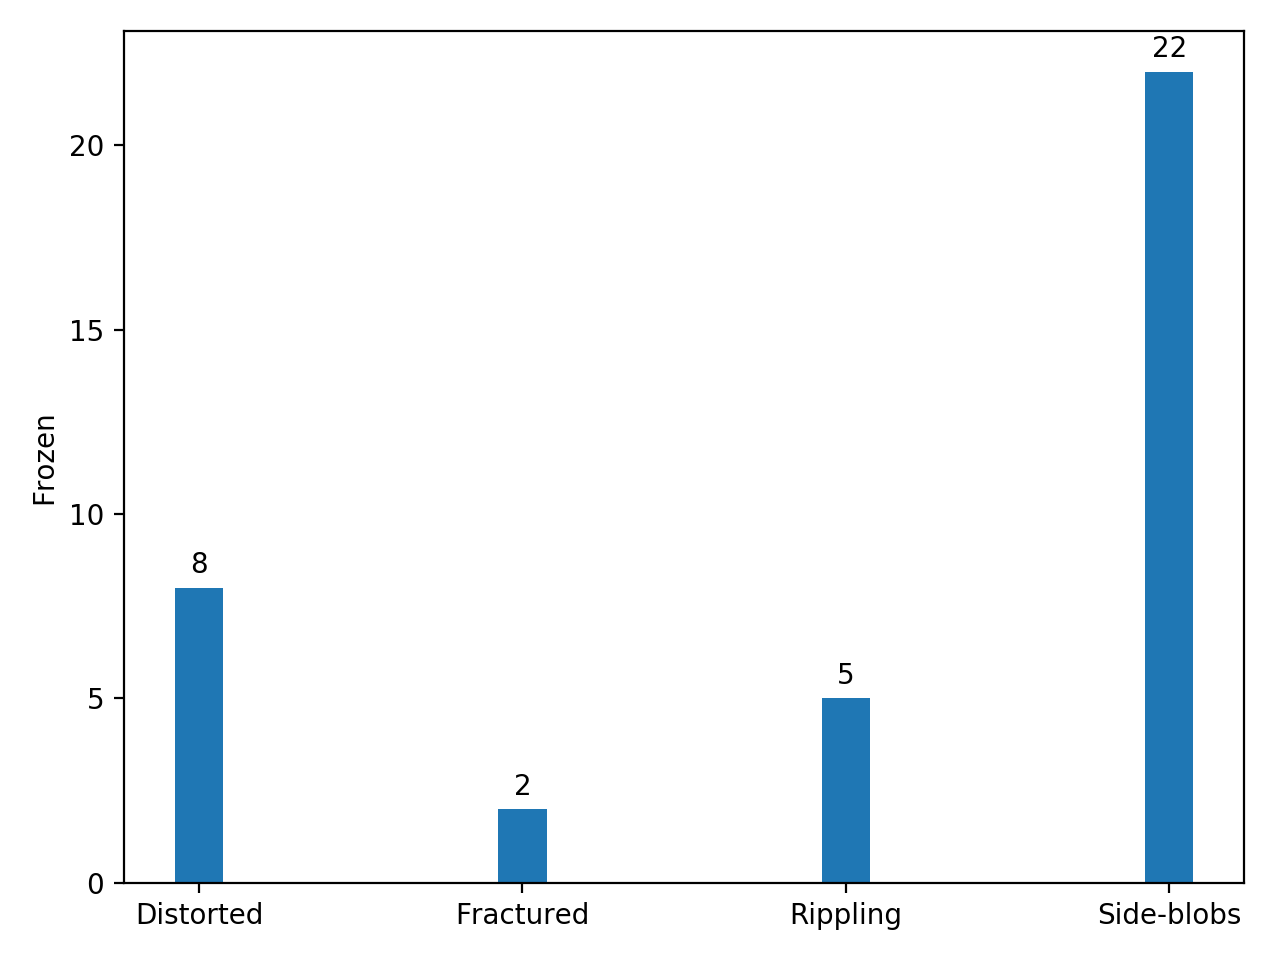

In [51]:
labels = ['Distorted', 'Fractured', 'Rippling', 'Side-blobs']

fraction = [8, 2, 5, 22]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , fraction, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frozen')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)

fig.tight_layout()